In [11]:
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np

True

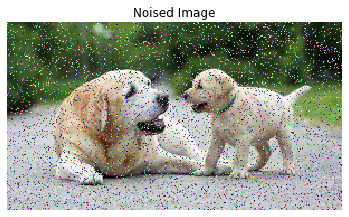

In [12]:
img = cv2.imread('img.jpg')
height, width, dim = img.shape
size = img.size
red_lim = int(size*0.05)
i = 0

#Introducing noise in the image
while i < red_lim:
    img[random.randint(0, height-1), random.randint(0, width-1)] = (random.randint(0,255),random.randint(0,255),random.randint(0,255))
    i+=1

#Displaying the Noised Image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Noised Image")
plt.axis("off")

#Saving the Noised Image in the current working directory
cv2.imwrite("Noised_img.jpg", img)

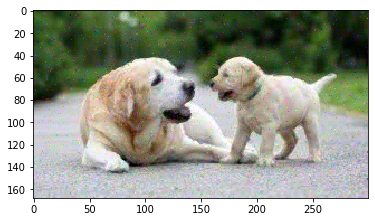

In [13]:
def pix_dif(p1, p2):
    if(p1>p2):
        return int(p1-p2)
    else:
        return int(p2-p1)
img = cv2.imread('Noised_img.jpg')
b, g, r = cv2.split(img)
channels = [b, g, r]
row_edges = [0,height-1]
col_edges = [0,width-1]


#Denoising by replacing with median
for color in channels:
    for j in range(0, height):
        for k in range(0, width):
            if j not in row_edges and k not in col_edges:
                diff = [pix_dif(color[j,k], color[j-1,k-1]),
                        pix_dif(color[j,k], color[j-1,k]),
                        pix_dif(color[j,k], color[j-1,k+1]),
                        pix_dif(color[j,k], color[j,k-1]),
                        pix_dif(color[j,k], color[j,k+1]),
                        pix_dif(color[j,k], color[j+1,k-1]),
                        pix_dif(color[j,k], color[j+1,k]),
                        pix_dif(color[j,k], color[j+1,k+1])
                       ]
                mean = (int(color[j-1,k-1])+int(color[j-1,k])+int(color[j-1,k+1])+int(color[j,k-1])+
                        int(color[j,k+1])+int(color[j+1,k-1])+int(color[j+1,k])+int(color[j+1,k+1]))//8
                temp = [color[j,k], color[j-1,k-1], color[j-1,k], color[j-1,k+1],
                        color[j,k-1], color[j,k+1], color[j+1,k-1], color[j+1,k], color[j+1,k+1]]
                temp = sorted(temp)
                median = temp[4]
                count = sum(map(lambda x:x>40, diff))
                if count>2:
                    color[j,k] = median
                
            elif j==0 and k!=width-1:
                diff = [pix_dif(color[j,k], color[j,k+1]),
                       pix_dif(color[j,k], color[j+1,k]),
                       pix_dif(color[j,k], color[j+1,k+1])]
                
                mean = (int(color[j,k+1])+int(color[j+1,k])+int(color[j+1,k+1]))//3
                temp = [color[j,k], color[j,k+1], color[j+1,k], color[j+1,k+1]]
                temp = sorted(temp)
                median = (int(temp[1])+int(temp[2]))/2
                count = sum(map(lambda x:x>40, diff))
                if count>=1:
                    color[j,k] = median
                
            elif j==height-1 and k!=width-1:
                diff = [pix_dif(color[j,k], color[j,k+1]),
                       pix_dif(color[j,k], color[j-1,k]),
                       pix_dif(color[j,k], color[j-1,k+1])]
                mean = (int(color[j,k+1])+int(color[j-1,k])+int(color[j-1,k+1]))//3
                temp = [color[j,k], color[j,k+1], color[j-1,k], color[j-1,k+1]]
                temp =sorted(temp)
                median = (int(temp[1])+int(temp[2]))//2
                count = sum(map(lambda x:x>40, diff))
                if count>=1:
                    color[j,k] = median
                
            elif k==0:
                diff = [pix_dif(color[j,k], color[j-1,k]),
                       pix_dif(color[j,k], color[j-1,k+1]),
                       pix_dif(color[j,k], color[j,k+1])]
                mean = (int(color[j-1,k])+int(color[j-1,k+1])+int(color[j,k+1]))//3
                temp = [color[j,k], color[j,k+1], color[j-1,k], color[j-1,k+1]]
                temp = sorted(temp)
                median = (int(temp[1])+int(temp[2]))//2
                count = sum(map(lambda x:x>40, diff))
                if count>=1:
                    color[j,k] = median
                
            elif k==width-1 and j!=height-1:
                diff = [pix_dif(color[j,k], color[j,k-1]),
                       pix_dif(color[j,k], color[j+1,k]),
                       pix_dif(color[j,k], color[j+1,k-1])]
                mean = (int(color[j,k-1])+int(color[j+1,k])+int(color[j+1,k-1]))//3
                temp = [color[j,k], color[j,k-1], color[j+1,k], color[j+1,k-1]]
                temp = sorted(temp)
                median = (int(temp[1])+int(temp[2]))//2
                count = sum(map(lambda x:x>40, diff))
                if count>=1:
                    color[j,k] = median

            else:
                diff = [pix_dif(color[j,k], color[j,k-1]),
                       pix_dif(color[j,k], color[j-1,k]),
                       pix_dif(color[j,k], color[j-1,k-1])]
                mean = (int(color[j,k-1])+int(color[j-1,k])+int(color[j-1,k-1]))//3
                temp = [color[j,k], color[j,k-1], color[j-1,k], color[j-1,k-1]]
                temp = sorted(temp)
                median = median = (int(temp[1])+int(temp[2]))//2
                count = sum(map(lambda x:x>40, diff))
                if count>=1:
                    color[j,k] = median
                    
img = cv2.merge((b, g, r))

#Displaying the denoised images
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

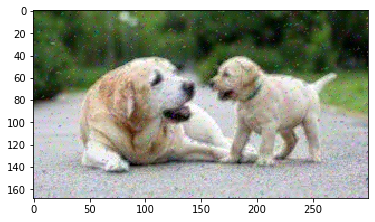

In [14]:
def pix_dif(p1, p2):
    if(p1>p2):
        return int(p1-p2)
    else:
        return int(p2-p1)
img = cv2.imread('Noised_img.jpg')
b, g, r = cv2.split(img)
channels = [b, g, r]
row_edges = [0,height-1]
col_edges = [0,width-1]


#Denoising by replacing with mean
for color in channels:
    for j in range(0, height):
        for k in range(0, width):
            if j not in row_edges and k not in col_edges:
                diff = [pix_dif(color[j,k], color[j-1,k-1]),
                        pix_dif(color[j,k], color[j-1,k]),
                        pix_dif(color[j,k], color[j-1,k+1]),
                        pix_dif(color[j,k], color[j,k-1]),
                        pix_dif(color[j,k], color[j,k+1]),
                        pix_dif(color[j,k], color[j+1,k-1]),
                        pix_dif(color[j,k], color[j+1,k]),
                        pix_dif(color[j,k], color[j+1,k+1])
                       ]
                mean = (int(color[j-1,k-1])+int(color[j-1,k])+int(color[j-1,k+1])+int(color[j,k-1])+
                        int(color[j,k+1])+int(color[j+1,k-1])+int(color[j+1,k])+int(color[j+1,k+1]))//8
                temp = [color[j,k], color[j-1,k-1], color[j-1,k], color[j-1,k+1],
                        color[j,k-1], color[j,k+1], color[j+1,k-1], color[j+1,k], color[j+1,k+1]]
                temp = sorted(temp)
                median = temp[4]
                count = sum(map(lambda x:x>40, diff))
                if count>2:
                    color[j,k] = mean
                
            elif j==0 and k!=width-1:
                diff = [pix_dif(color[j,k], color[j,k+1]),
                       pix_dif(color[j,k], color[j+1,k]),
                       pix_dif(color[j,k], color[j+1,k+1])]
                
                mean = (int(color[j,k+1])+int(color[j+1,k])+int(color[j+1,k+1]))//3
                temp = [color[j,k], color[j,k+1], color[j+1,k], color[j+1,k+1]]
                temp = sorted(temp)
                median = (int(temp[1])+int(temp[2]))/2
                count = sum(map(lambda x:x>40, diff))
                if count>=1:
                    color[j,k] = mean
                
            elif j==height-1 and k!=width-1:
                diff = [pix_dif(color[j,k], color[j,k+1]),
                       pix_dif(color[j,k], color[j-1,k]),
                       pix_dif(color[j,k], color[j-1,k+1])]
                mean = (int(color[j,k+1])+int(color[j-1,k])+int(color[j-1,k+1]))//3
                temp = [color[j,k], color[j,k+1], color[j-1,k], color[j-1,k+1]]
                temp =sorted(temp)
                median = (int(temp[1])+int(temp[2]))//2
                count = sum(map(lambda x:x>40, diff))
                if count>=1:
                    color[j,k] = mean
                
            elif k==0:
                diff = [pix_dif(color[j,k], color[j-1,k]),
                       pix_dif(color[j,k], color[j-1,k+1]),
                       pix_dif(color[j,k], color[j,k+1])]
                mean = (int(color[j-1,k])+int(color[j-1,k+1])+int(color[j,k+1]))//3
                temp = [color[j,k], color[j,k+1], color[j-1,k], color[j-1,k+1]]
                temp = sorted(temp)
                median = (int(temp[1])+int(temp[2]))//2
                count = sum(map(lambda x:x>40, diff))
                if count>=1:
                    color[j,k] = mean
                
            elif k==width-1 and j!=height-1:
                diff = [pix_dif(color[j,k], color[j,k-1]),
                       pix_dif(color[j,k], color[j+1,k]),
                       pix_dif(color[j,k], color[j+1,k-1])]
                mean = (int(color[j,k-1])+int(color[j+1,k])+int(color[j+1,k-1]))//3
                temp = [color[j,k], color[j,k-1], color[j+1,k], color[j+1,k-1]]
                temp = sorted(temp)
                median = (int(temp[1])+int(temp[2]))//2
                count = sum(map(lambda x:x>40, diff))
                if count>=1:
                    color[j,k] = mean

            else:
                diff = [pix_dif(color[j,k], color[j,k-1]),
                       pix_dif(color[j,k], color[j-1,k]),
                       pix_dif(color[j,k], color[j-1,k-1])]
                mean = (int(color[j,k-1])+int(color[j-1,k])+int(color[j-1,k-1]))//3
                temp = [color[j,k], color[j,k-1], color[j-1,k], color[j-1,k-1]]
                temp = sorted(temp)
                median = median = (int(temp[1])+int(temp[2]))//2
                count = sum(map(lambda x:x>40, diff))
                if count>=1:
                    color[j,k] = mean
                    
img = cv2.merge((b, g, r))

#Displaying the denoised image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))